In [18]:
# Importing Libs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
# My Tools
from toolkit.tools import print_column_uniques, make_df

%matplotlib inline

In [19]:
plt.rcParams['figure.figsize'] = [12, 7]

In [20]:
sns.set()

In [21]:
df = pd.read_csv('../enc_devs_py_2021_fixed.csv')

In [22]:
from IPython.core.display import HTML as Center

Center(""" <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """)

In [23]:
# Light
color_hombres_light = (12/255, 50/255, 196/255, 0.5)
color_mujeres_light = (255/255, 192/255, 203/255, 0.5)
color_neutro_light = (149/255, 165/255, 166/255, 0.5)
# Dark
color_hombres_dark = (12/255, 50/255, 196/255, 0.8)
color_mujeres_dark = (255/255, 192/255, 203/255, 0.8)
color_neutro_dark = (149/255, 165/255, 166/255, 0.8)

# EXPERIENCIA

    - Sobre la 'experiencia' de las personas que respondieron la encuesta.

## GENERAL 

In [24]:
df['exp_en_IT'].value_counts()

5-9      124
<5        94
10-14     82
15-19     20
20-24      9
25-29      5
30-34      4
35-39      2
>50        1
45-49      1
Name: exp_en_IT, dtype: int64

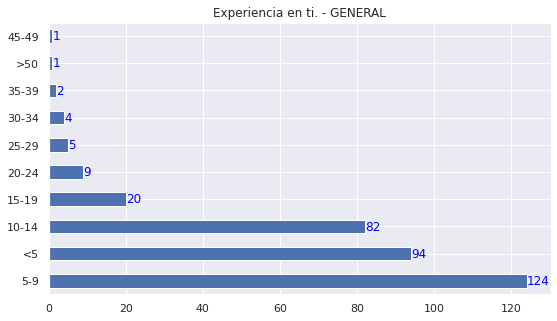

In [25]:


fig = plt.figure(figsize=(9,5))


exp_ti = df['exp_en_IT'].value_counts().plot(kind='barh', title='Experiencia en ti. - GENERAL')

for k,v in enumerate(df['exp_en_IT'].value_counts().values):
       exp_ti.annotate(v,(v,k),  va='center',color='blue')

plt.show()



## Experiencia en TI. POR GENERO

In [9]:
gen = df.groupby('genero')

### EXPERIENCIA EN TI - HOMBRES

In [10]:
gen.get_group('HOMBRE')['exp_en_IT'].value_counts()

5-9      98
<5       75
10-14    71
15-19    15
20-24     9
25-29     5
30-34     4
35-39     1
>50       1
Name: exp_en_IT, dtype: int64

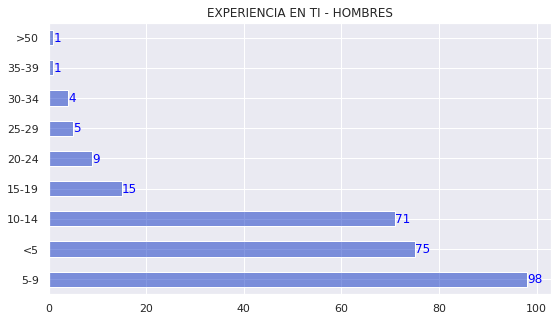

In [11]:
fig = plt.figure(figsize=(9,5))

homb_exp_ti = gen.get_group('HOMBRE')['exp_en_IT'].value_counts().plot(kind='barh', title='EXPERIENCIA EN TI - HOMBRES', color=color_hombres_light)


for k,v in enumerate(gen.get_group('HOMBRE')['exp_en_IT'].value_counts().values):
       homb_exp_ti.annotate(v,(v,k),  va='center',color='blue')

plt.show()


### EXPERIENCIA DE TI - MUJERES

In [12]:
gen.get_group('MUJER')['exp_en_IT'].value_counts()

5-9      23
<5       14
10-14     7
15-19     4
35-39     1
Name: exp_en_IT, dtype: int64

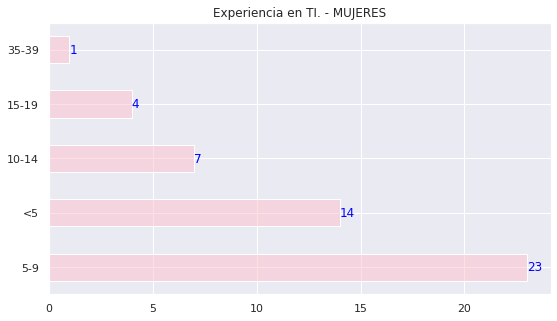

In [13]:
fig = plt.figure(figsize=(9,5))

exp_ti_mujer = gen.get_group('MUJER')['exp_en_IT'].value_counts().plot(
    kind='barh',
    title='Experiencia en TI. - MUJERES',
    color=color_mujeres_light
)


for k,v in enumerate(gen.get_group('MUJER')['exp_en_IT'].value_counts().values):
       exp_ti_mujer.annotate(v,(v,k),  va='center',color='blue')

plt.show()


### Experiencia en TI. - NO DEFINIDO

In [14]:
gen.get_group('NO COMPARTO')['exp_en_IT'].value_counts()

<5       2
10-14    2
5-9      1
45-49    1
Name: exp_en_IT, dtype: int64

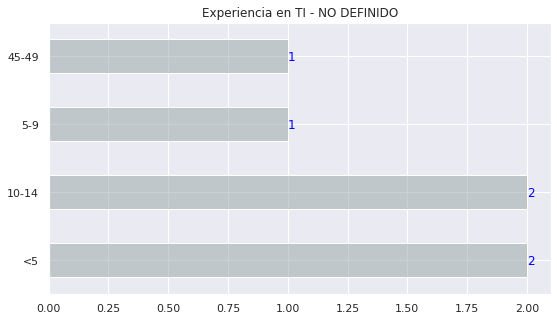

In [15]:
fig = plt.figure(figsize=(9,5))


exp_ti_no_comp = gen.get_group('NO COMPARTO')['exp_en_IT'].value_counts().plot(
    kind='barh',
    title='Experiencia en TI - NO DEFINIDO',
    color =color_neutro_light )


for k,v in enumerate(gen.get_group('NO COMPARTO')['exp_en_IT'].value_counts().values):
       exp_ti_no_comp.annotate(v,(v,k),  va='center',color='blue')

plt.show()


# Experiencia en codificacion - GENERAL

In [16]:
df['exp_en_programacion'].value_counts()

5-9      125
<5       111
10-14     64
15-19     20
20-24      7
25-29      6
30-34      4
35-39      2
Name: exp_en_programacion, dtype: int64

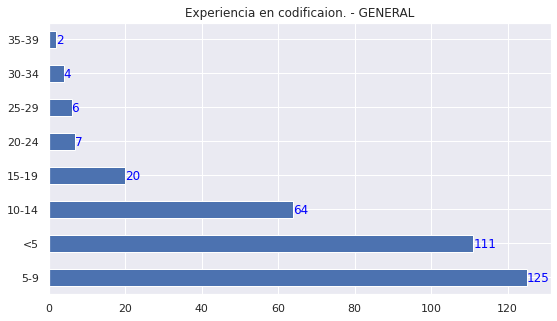

In [17]:

fig = plt.figure(figsize=(9,5))


exp_coding = df['exp_en_programacion'].value_counts().plot(
    kind='barh',
    title='Experiencia en codificaion. - GENERAL')


for k,v in enumerate(df['exp_en_programacion'].value_counts().values):
       exp_coding.annotate(v,(v,k),  va='center',color='blue')

plt.show()


### Experiencia en codificacion. - POR GENERO

#### EXPERIENCIA CODIFICANDO - HOMBRES

In [18]:
gen.get_group('HOMBRE')['exp_en_programacion'].value_counts()

5-9      97
<5       90
10-14    57
15-19    16
20-24     7
25-29     6
30-34     4
35-39     1
Name: exp_en_programacion, dtype: int64

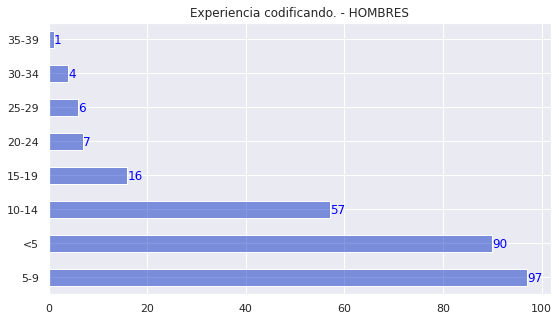

In [19]:


fig = plt.figure(figsize=(9,5))

homb_exp_coding = gen.get_group('HOMBRE')['exp_en_programacion'].value_counts().plot(
    kind='barh',
    title='Experiencia codificando. - HOMBRES',
    color=color_hombres_light)



for k,v in enumerate(gen.get_group('HOMBRE')['exp_en_programacion'].value_counts().values):
       homb_exp_coding.annotate(v,(v,k),  va='center',color='blue')

plt.show()


### EXPERIENCIA CODIFICANDO - MUJERES

In [20]:
gen.get_group('MUJER')['exp_en_programacion'].value_counts()

5-9      23
<5       17
10-14     5
15-19     2
35-39     1
Name: exp_en_programacion, dtype: int64

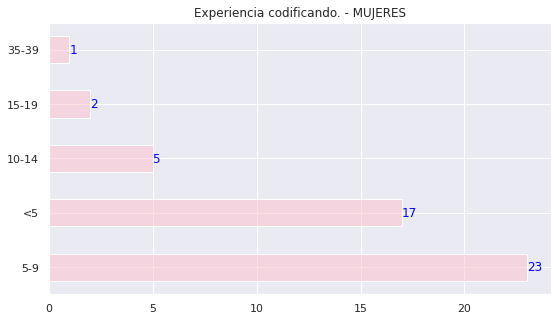

In [21]:
fig = plt.figure(figsize=(9,5))

muj_exp_coding = gen.get_group('MUJER')['exp_en_programacion'].value_counts().plot(
    kind='barh',
    title='Experiencia codificando. - MUJERES',
    color=color_mujeres_light)




for k,v in enumerate(gen.get_group('MUJER')['exp_en_programacion'].value_counts().values):
       muj_exp_coding.annotate(v,(v,k),  va='center',color='blue')

plt.show()

### EXPERIENCIA CODIFICANDO - NO COMPARTO

In [22]:
gen.get_group('NO COMPARTO')['exp_en_programacion'].value_counts()

10-14    2
5-9      1
15-19    1
<5       1
Name: exp_en_programacion, dtype: int64

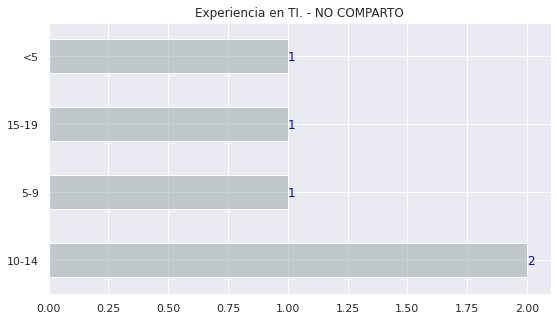

In [23]:
fig = plt.figure(figsize=(9,5))


no_comp_exp_coding = gen.get_group('NO COMPARTO')['exp_en_programacion'].value_counts().plot(
    kind='barh',
    title='Experiencia en TI. - NO COMPARTO',
    color=color_neutro_light)


for k,v in enumerate(gen.get_group('NO COMPARTO')['exp_en_programacion'].value_counts().values):
       no_comp_exp_coding.annotate(v,(v,k),  va='center',color='blue')

plt.show()

# Primera linea de codigo en maquina. - GENERAL

In [24]:
df['1_linea_de_codigo'].value_counts()

<10      101
10-11     55
14-15     51
12-13     37
16-17     31
18-19     27
20-21     16
>30        6
22-23      4
26-27      4
24-25      3
28-29      3
Name: 1_linea_de_codigo, dtype: int64

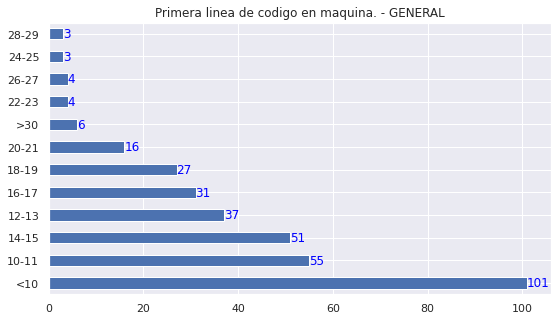

In [25]:

fig = plt.figure(figsize=(9,5))

prim_linea_coding = df['1_linea_de_codigo'].value_counts().plot(
    kind='barh',
    title='Primera linea de codigo en maquina. - GENERAL')



for k,v in enumerate(df['1_linea_de_codigo'].value_counts().values):
       prim_linea_coding.annotate(v,(v,k),  va='center',color='blue')

plt.show()

# PRIMERA LINEA DE CODIGO EN MAQUINA - POR GENERO


### PRIMERA LINEA EN MAQUINA - SOLO HOMBRES

In [26]:
gen.get_group('HOMBRE')['1_linea_de_codigo'].value_counts()

<10      86
10-11    45
14-15    38
16-17    29
12-13    29
18-19    22
20-21    11
>30       5
26-27     4
24-25     3
22-23     3
28-29     2
Name: 1_linea_de_codigo, dtype: int64

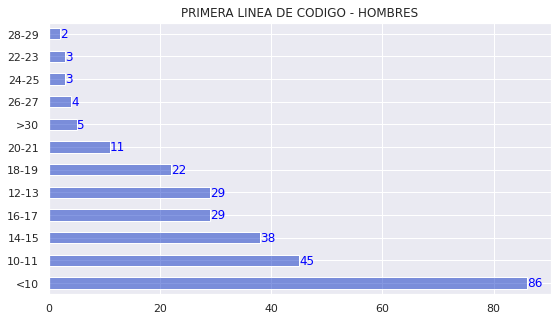

In [27]:
fig = plt.figure(figsize=(9,5))

prim_linea_coding_hombres = gen.get_group('HOMBRE')['1_linea_de_codigo'].value_counts().plot(
    kind='barh',
    title='PRIMERA LINEA DE CODIGO - HOMBRES',
    color = color_hombres_light)

for k,v in enumerate(gen.get_group('HOMBRE')['1_linea_de_codigo'].value_counts().values):
       prim_linea_coding_hombres.annotate(v,(v,k),  va='center',color='blue')

plt.show()

### PRIMERA LINEA EN MAQUINA - MUJERES

In [28]:
gen.get_group('MUJER')['1_linea_de_codigo'].value_counts()

<10      13
14-15    12
12-13     7
10-11     6
18-19     4
20-21     2
16-17     1
28-29     1
>30       1
Name: 1_linea_de_codigo, dtype: int64

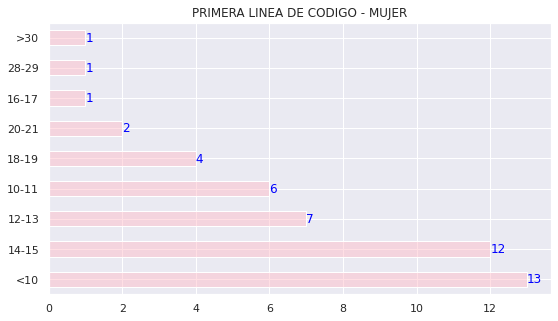

In [29]:

fig = plt.figure(figsize=(9,5))

prim_linea_coding_mujeres = gen.get_group('MUJER')['1_linea_de_codigo'].value_counts().plot(
    kind='barh',
    title='PRIMERA LINEA DE CODIGO - MUJER',
    color = color_mujeres_light)

for k,v in enumerate(gen.get_group('MUJER')['1_linea_de_codigo'].value_counts().values):
       prim_linea_coding_mujeres.annotate(v,(v,k),  va='center',color='blue')

plt.show()

# PRIMERA LINEA EN MAQUINA - NO DEFINIDO

In [30]:
gen.get_group('NO COMPARTO')['1_linea_de_codigo'].value_counts()

10-11    2
22-23    1
18-19    1
14-15    1
20-21    1
Name: 1_linea_de_codigo, dtype: int64

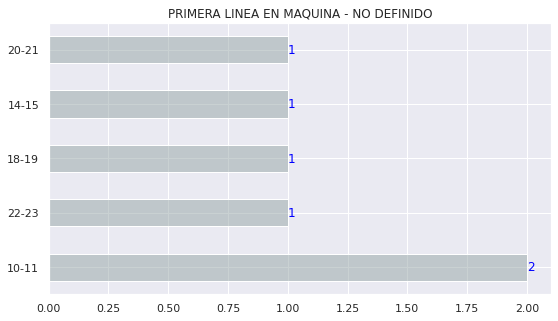

In [31]:


fig = plt.figure(figsize=(9,5))

prim_linea_cod_no_comp =  gen.get_group('NO COMPARTO')['1_linea_de_codigo'].value_counts().plot(
    kind='barh', 
    title='PRIMERA LINEA EN MAQUINA - NO DEFINIDO',
    color= color_neutro_light)



for k,v in enumerate(gen.get_group('NO COMPARTO')['1_linea_de_codigo'].value_counts().values):
       prim_linea_cod_no_comp.annotate(v,(v,k),  va='center',color='blue')

plt.show()

# GENERAL

### EXPERIENCIA VS MODALIDAD

- Se pretende explorar el tipo de trabajo que realizan segun la experiencia en TI.

In [32]:
exp = df.groupby('exp_en_IT')

In [33]:
exp_cats = [i for i in exp.groups.keys()]

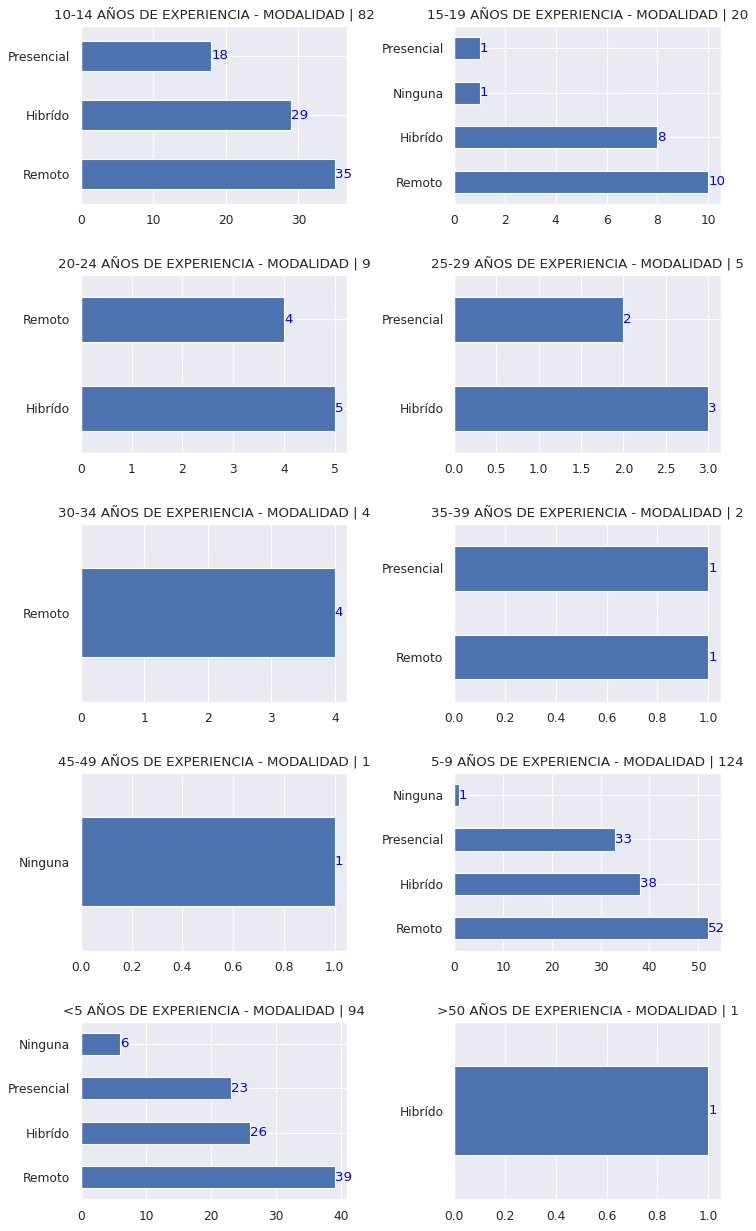

In [34]:
plt.figure(figsize=(10, 30), dpi=80) 


for k,v in enumerate(exp_cats):
    plt.subplot(8,2,k+1)
    mod = exp.get_group(v)['modalidad'].value_counts().plot(
        kind='barh',
        title='{0} AÑOS DE EXPERIENCIA - MODALIDAD | {1}'.format(v,exp.get_group(v)['modalidad'].shape[0])
    )
    for l,m in enumerate(exp.get_group(v)['modalidad'].value_counts().values):
       mod.annotate(m,(m,l),  va='center',color='blue')

    

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

### EXPERIENCIA EN TI  VS IMPORTANCIA DE LA EDUCACION FORMAL
    - Postura sobre la "importancia de la educacion formal" de los que respondieron la
    encuesta segun los años de experiencia en TI.

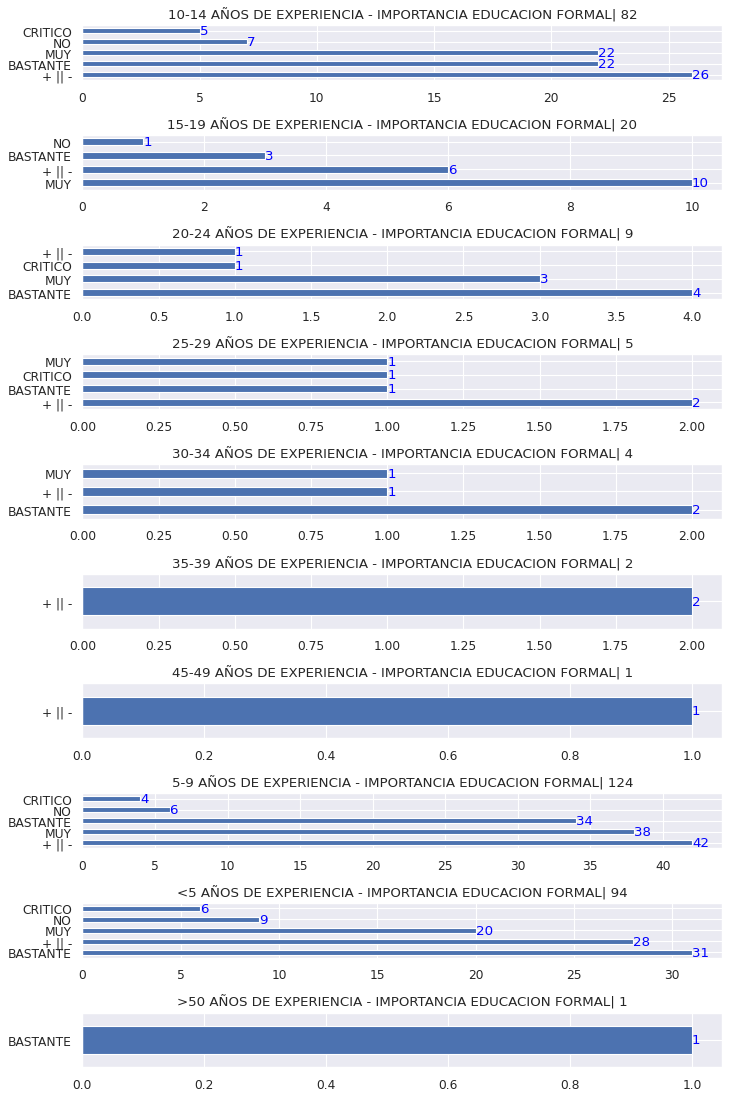

In [35]:
plt.figure(figsize=(10, 30), dpi=80) 


for k,v in enumerate(exp_cats):
    plt.subplot(18,1,k+1)
    imp = exp.get_group(v)['imp_ed_formal'].value_counts().plot(
        kind='barh',
        title='{0} AÑOS DE EXPERIENCIA - IMPORTANCIA EDUCACION FORMAL| {1}'.format(v, exp.get_group(v).shape[0])
    )

    for l,m in enumerate(exp.get_group(v)['imp_ed_formal'].value_counts().values):
       imp.annotate(m,(m,l),  va='center',color='blue')

    


plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=1)

### EXPERIENCIA EN TI VS LENGUAJE FAVORITO
  - Se explora la relacion entre los años de experiencia en TI vs el lenguaje favorito.

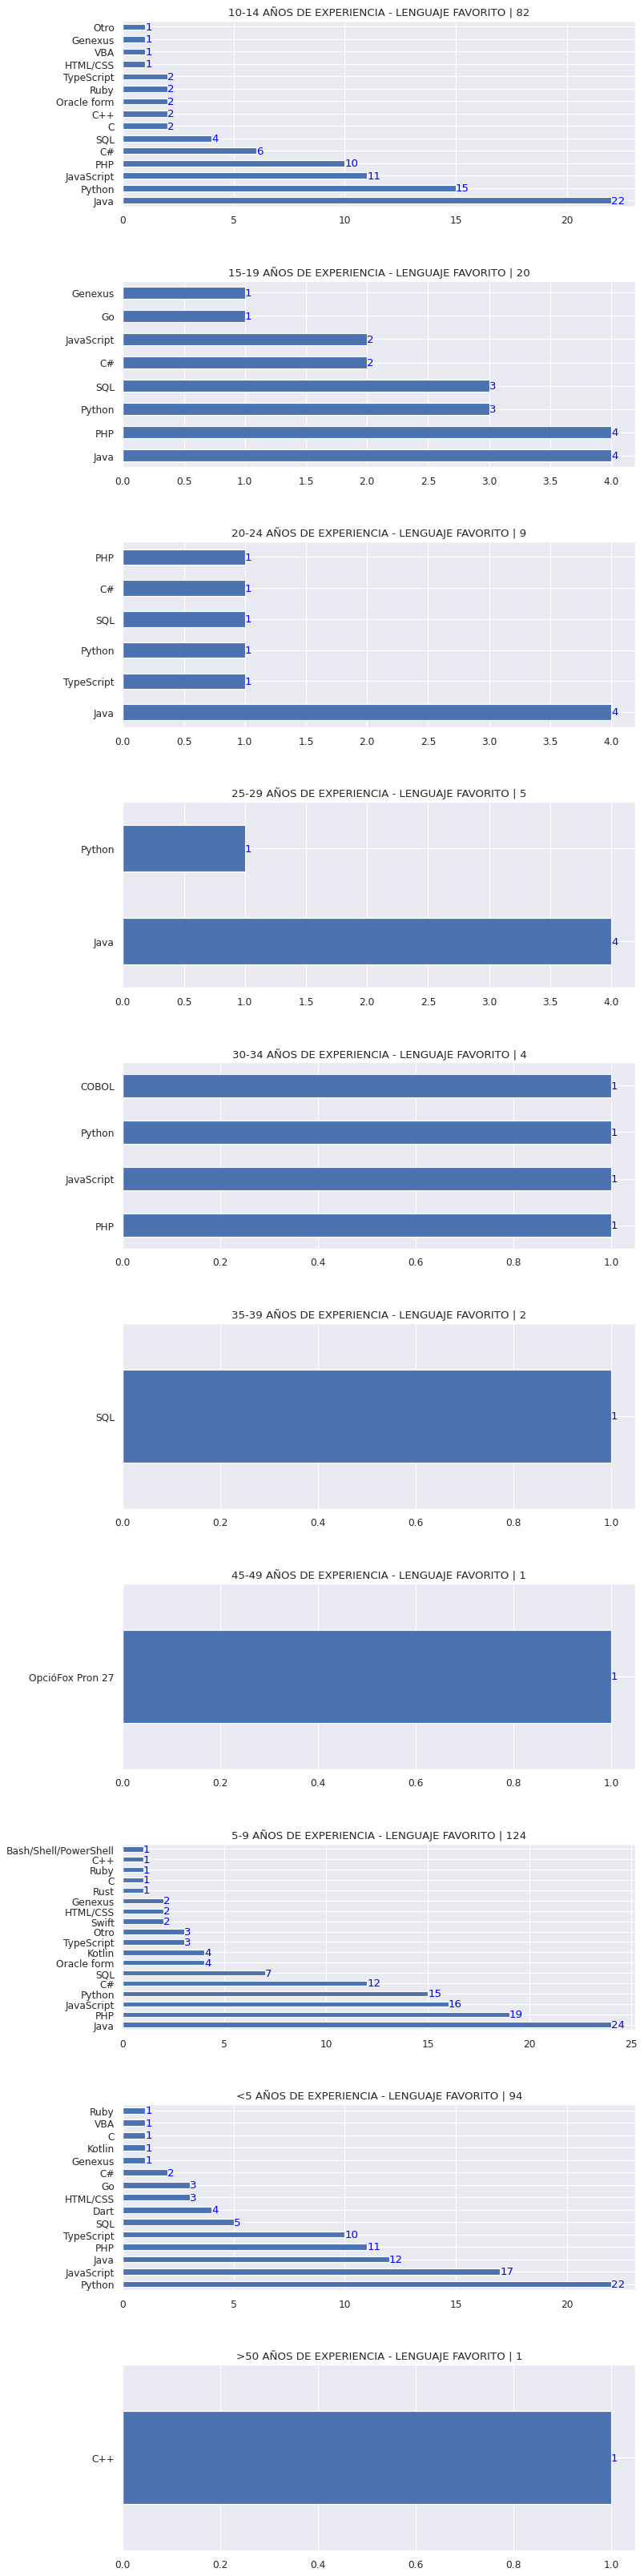

In [36]:
plt.figure(figsize=(10, 90), dpi=80) 


for k,v in enumerate(exp_cats):
    plt.subplot(18,1,k+1)
    leng = exp.get_group(v)['leng_fav'].value_counts().plot(
        kind='barh',
        title='{0} AÑOS DE EXPERIENCIA - LENGUAJE FAVORITO | {1}'.format(v,exp.get_group(v)['leng_fav'].shape[0])
    )

    for l,m in enumerate(exp.get_group(v)['leng_fav'].value_counts().values):
       leng.annotate(m,(m,l),  va='center',color='blue')

    


plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

### EXPERIENCIA EN TI VS LENGUAJE MAS ODIADO
  - Se explora la relacion entre los años de experiencia en TI vs el lenguaje mas odiado.

In [37]:
exp.get_group('35-39')['leng_mas_odiado'].value_counts()

Series([], Name: leng_mas_odiado, dtype: int64)

In [38]:
exp.get_group('35-39')['leng_mas_odiado']

20     NaN
271    NaN
Name: leng_mas_odiado, dtype: object

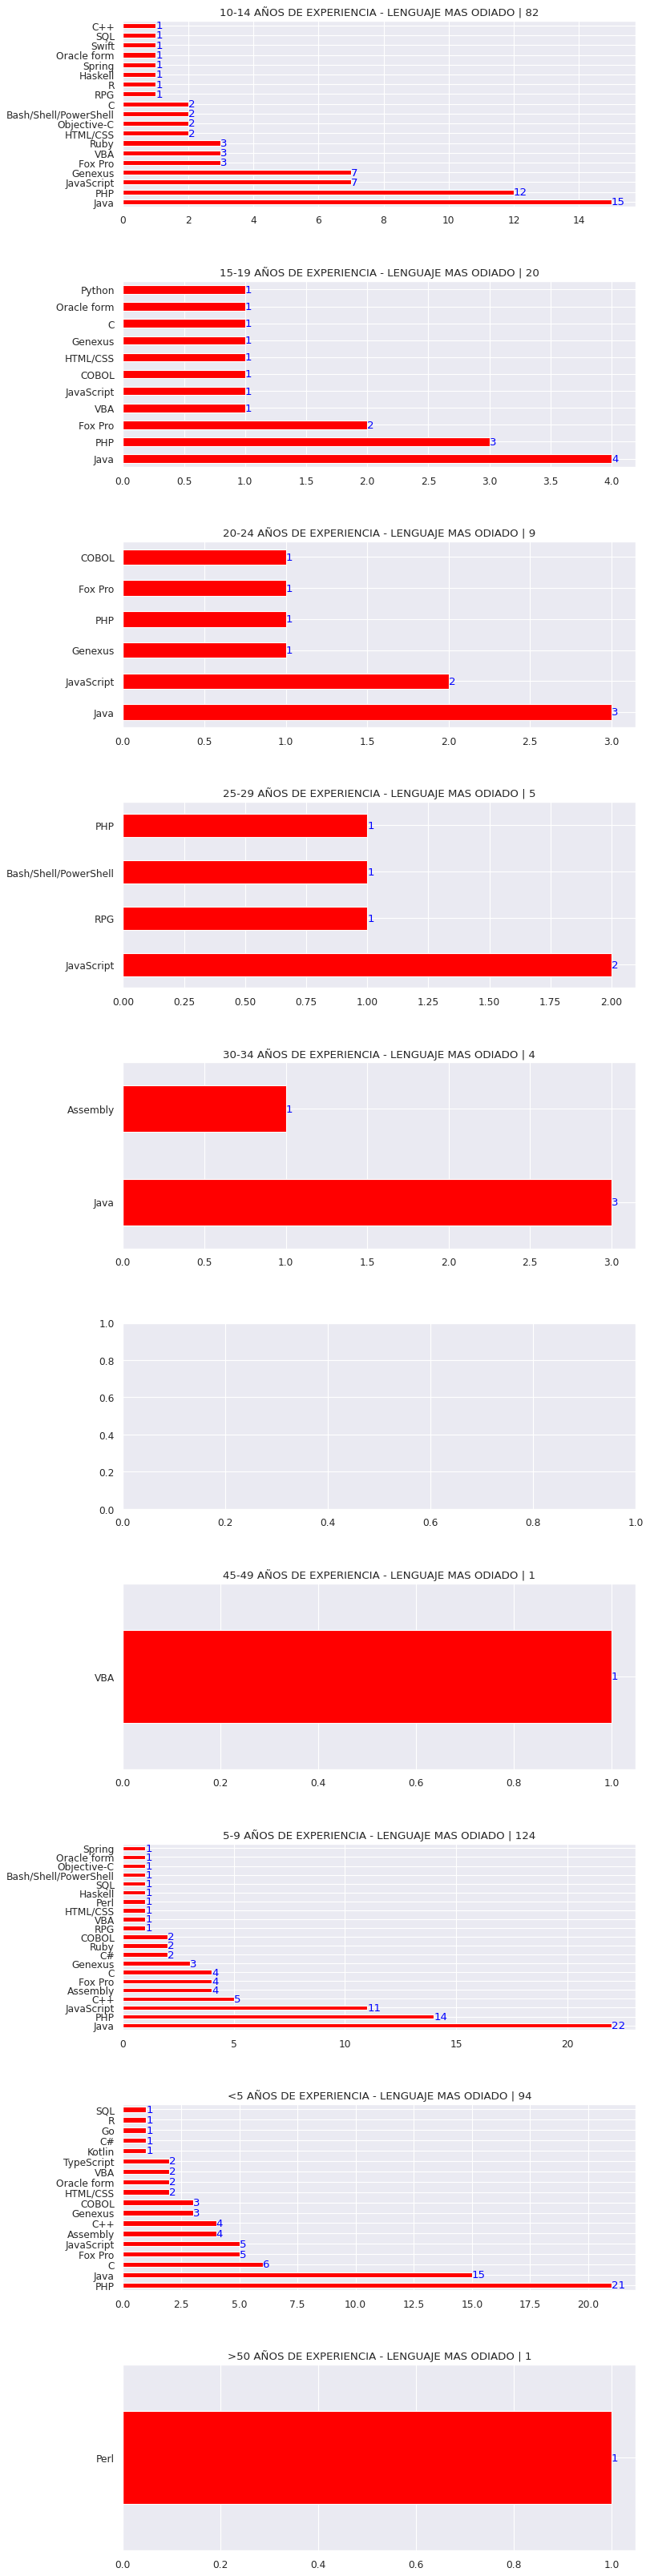

In [39]:
plt.figure(figsize=(10, 90), dpi=80) 


for k,v in enumerate(exp_cats):
    plt.subplot(18,1,k+1)
    if(len(exp.get_group(v)['leng_mas_odiado'].value_counts())>0):
        hated_lang = exp.get_group(v)['leng_mas_odiado'].value_counts().plot(
            kind='barh',
            color='red',
            title='{0} AÑOS DE EXPERIENCIA - LENGUAJE MAS ODIADO | {1}'.format(v,exp.get_group(v)['leng_mas_odiado'].shape[0])
        )
        for l,m in enumerate(exp.get_group(v)['leng_mas_odiado'].value_counts().values):
           hated_lang.annotate(m,(m,l),  va='center',color='blue')

    


plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

### EXPERIENCIA EN TI VS ORIGEN DEL TRABAJO
  - Se explora la experiencia en TI vs el origen del trabajo que realiza el encuestado.

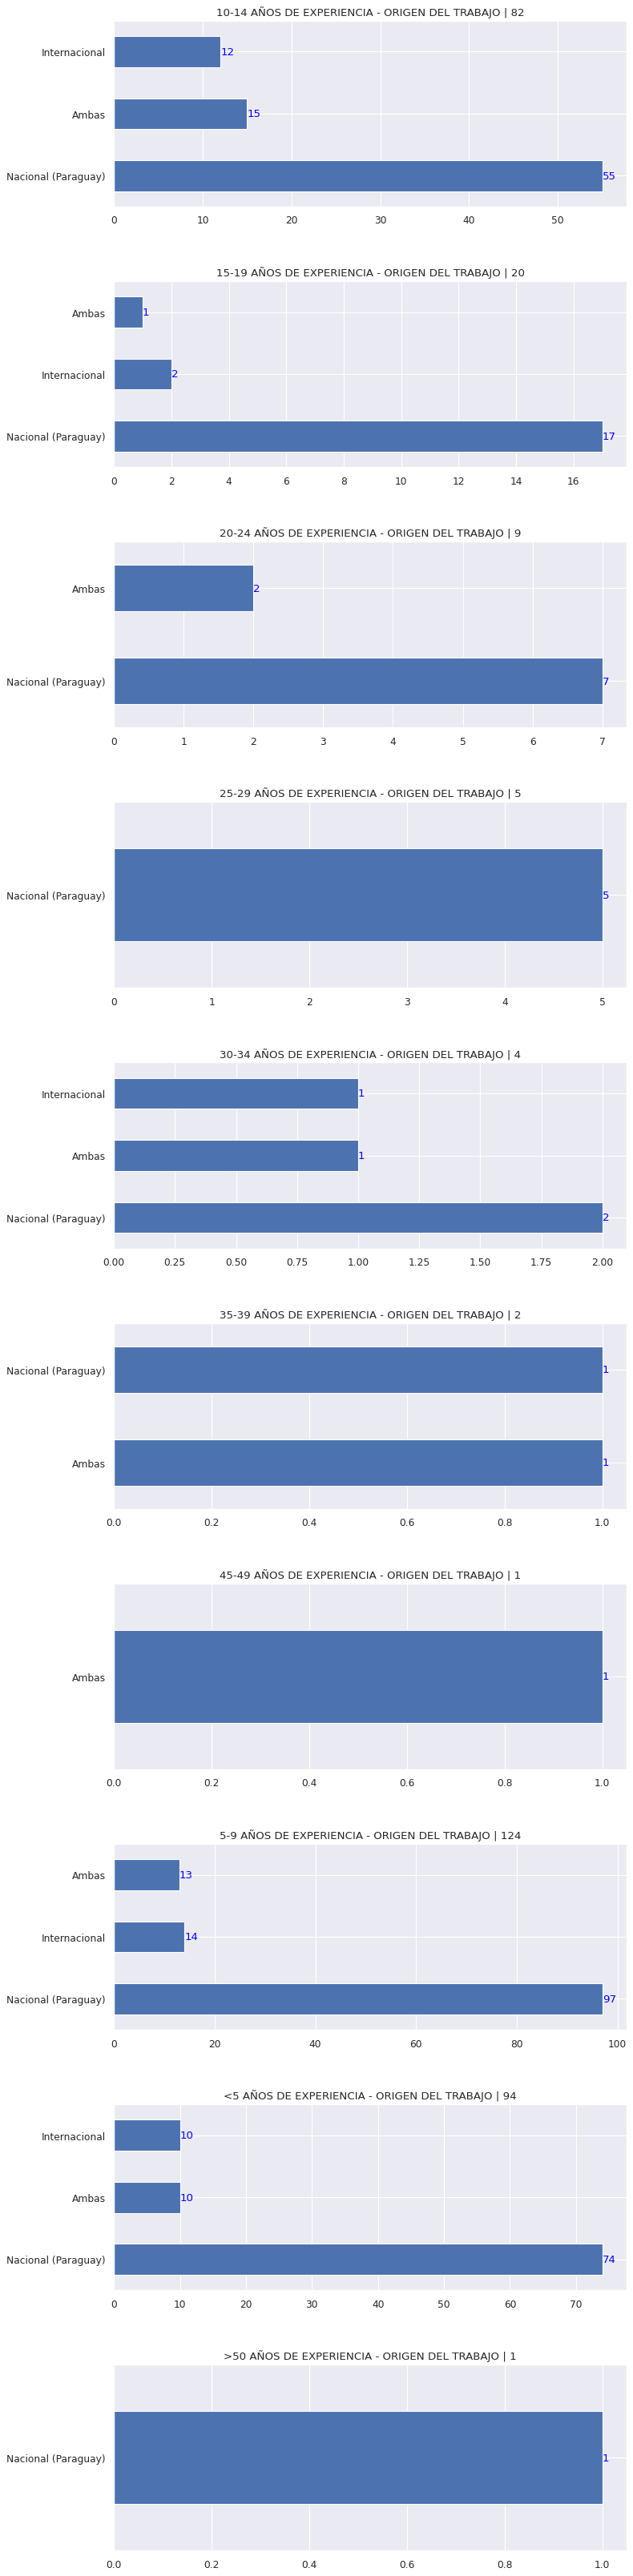

In [40]:
plt.figure(figsize=(10, 90), dpi=80) 


for k,v in enumerate(exp_cats):
    plt.subplot(18,1,k+1)
    if(len(exp.get_group(v)['trabajo'].value_counts())!=0):
        trab_exp = exp.get_group(v)['trabajo'].value_counts().plot(
            kind='barh',
            title='{0} AÑOS DE EXPERIENCIA - ORIGEN DEL TRABAJO | {1}'.format(v,exp.get_group(v)['trabajo'].shape[0])
        )
        for l,m in enumerate(exp.get_group(v)['trabajo'].value_counts().values):
           trab_exp.annotate(m,(m,l),  va='center',color='blue')

    


plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

### EXPERIENCIA EN TI VS TIPO DE TRABAJO
  - Se explora la experiencia en TI vs el tipo de trabajo que realizan los encuestados.

In [41]:
# title='{0} AÑOS DE EXPERIENCIA - TIPO DE TRABAJO | {1} '



### PRIMERA LINEA DE CODIGO VS OCUPACION

In [42]:
df.columns

Index(['marca_temp', 'modalidad', 'trabajo', 'tipo_de_trabajo', 'devops',
       'programar_x_trabajo', 'exp_en_IT', 'exp_en_programacion',
       '1_linea_de_codigo', 'educacion', 'carr_especialidades',
       'imp_ed_formal', 'genero', 'edad_actual', 'salario_mensual',
       'prog_script_leng', 'lib_frameworks', 'otras_lib_frameworks', 'db',
       'plataformas', 'leng_fav', 'leng_mas_odiado', 'fram_fav',
       'fram_mas_odiado', 'herramientas'],
      dtype='object')

In [65]:
carers = df.groupby('carr_especialidades')

In [72]:
carreras = df['carr_especialidades'].value_counts().keys()

In [73]:
len(carreras)

32

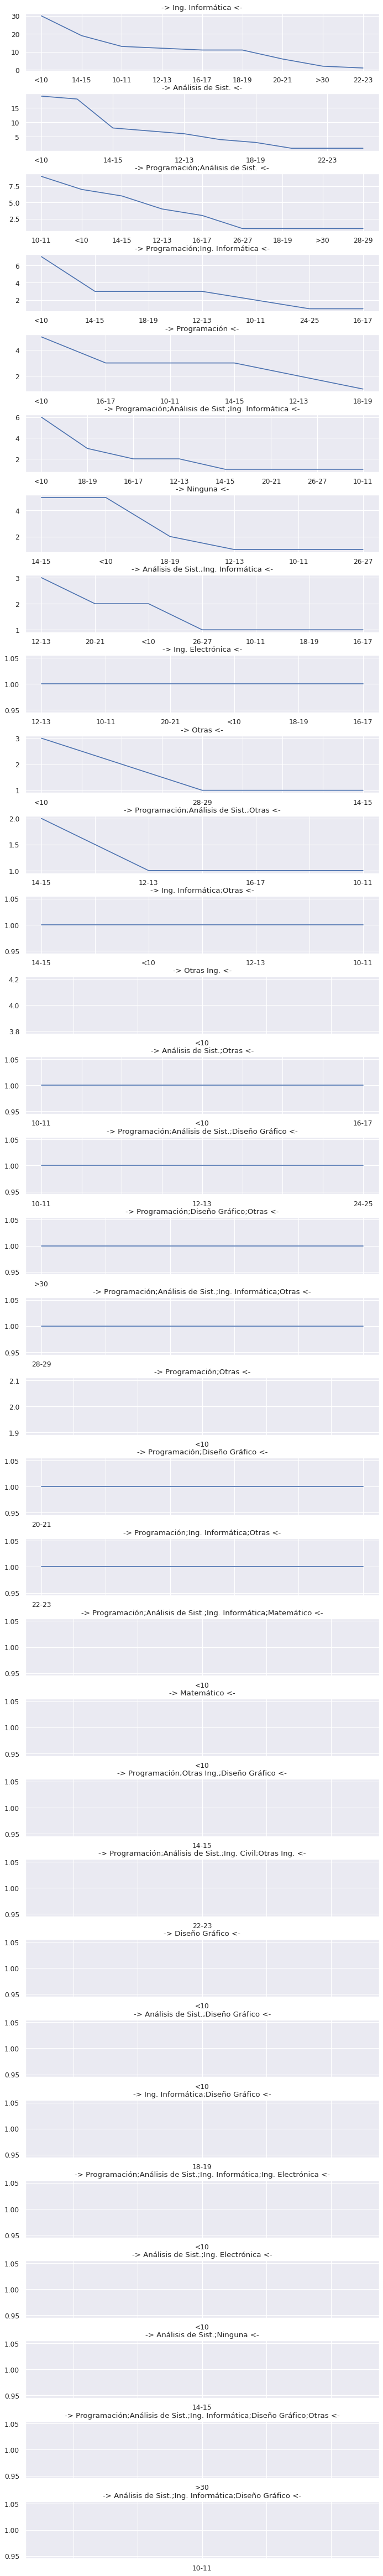

In [80]:

plt.figure(figsize=(10, 90), dpi=80) 


for k,v in enumerate(carreras):
    plt.subplot(35,1,k+1)
    carers.get_group(v)['1_linea_de_codigo'].value_counts().plot(
        title=f'-> {v} <-',
    )
    
    
    


plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=1)